# ObsID : 0945020137, SRCNUM : 21, Instru : EPN

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [2]:
s1 = Spectrum("ObsID0945020137_SRCNUM21_EPN_source_spectrum.fits")
s1.background = "ObsID0945020137_SRCNUM21_EPN_background_spectrum.fits"
s1.response = "ObsID0945020137_SRCNUM21_EPN.rmf"
s1.response.arf = "ObsID0945020137_SRCNUM21_EPN.arf"


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EPN_source_spectrum.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.015e-02 +/- 1.363e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.622e+04 sec
 Using fit statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:1  1.072e-02 +/- 1.472e-03 (35.6 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Response successfully loaded.
Arf successfully loaded.


## Plot spectrum

### test


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EPN_source_spectrum.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.015e-02 +/- 1.363e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.622e+04 sec
 Using fit statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:1  1.072e-02 +/- 1.472e-03 (35.6 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Response successfully loaded.
Arf successfully loaded.


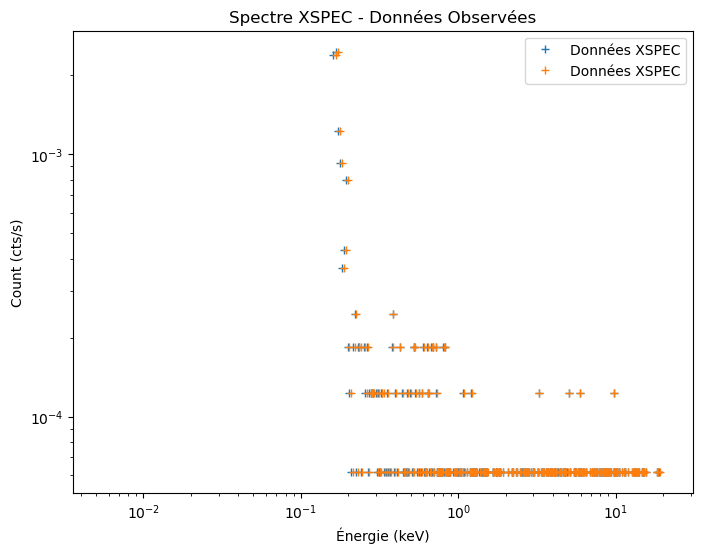


Model phabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.692391e+12     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.692391e+12     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 4093 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex   

In [3]:
import xspec
import matplotlib.pyplot as plt
import numpy as np

# Définition des fichiers
specFile = "ObsID0945020137_SRCNUM21_EPN_source_spectrum.fits"
backFile = "ObsID0945020137_SRCNUM21_EPN_background_spectrum.fits"
respFile = "ObsID0945020137_SRCNUM21_EPN.rmf"
arfFile = "ObsID0945020137_SRCNUM21_EPN.arf"

xspec.AllData(f"{specFile}")

spectrum = xspec.AllData(1)
spectrum.background = backFile
spectrum.response = respFile
spectrum.response.arf = arfFile

energies = np.array(spectrum.energies)
counts = np.array(spectrum.values) 

plt.figure(figsize=(8,6))
plt.plot(energies, counts, '+',label="Données XSPEC")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Énergie (keV)")
plt.ylabel("Count (cts/s)")
plt.legend()
plt.title("Spectre XSPEC - Données Observées")
plt.show()

xspec.Model("phabs*powerlaw")

# Ajuster le modèle
xspec.Fit.perform()

In [4]:
#Plot.device="/svg"
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
#Plot.device = "/png"

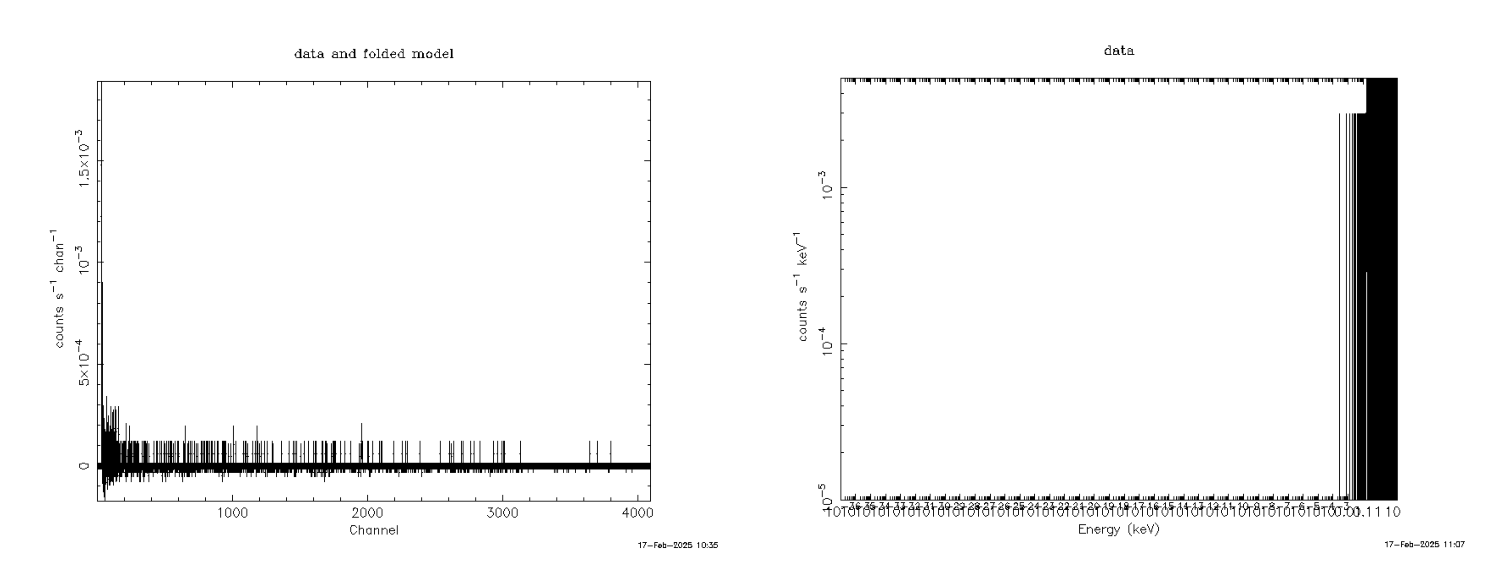

In [5]:
img_path1 = "ObsID0945020137_SRCNUM21_EPN_Spectrum.png"
img_path2 = "ObsID0945020137_SRCNUM21_EPN_Spectrum_energy.png"

images = [img_path1, img_path2]

fig, axes = plt.subplots(1, len(images), figsize=(15, 8))

for ax, img_path in zip(axes, images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Black body model


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              5.707692e+12     using 4096 bins.



(-0.5, 861.5, 665.5, -0.5)

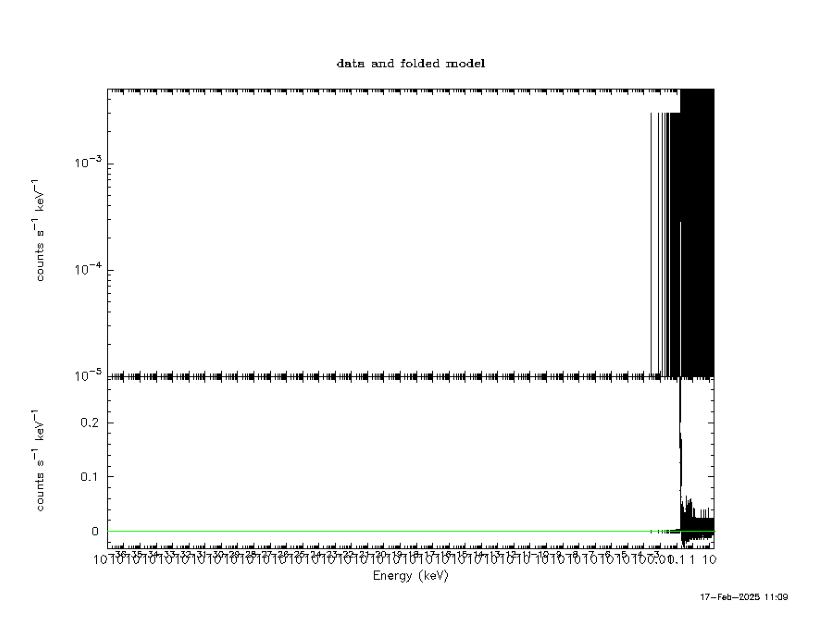

In [6]:
#spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

img_path = "ObsID0945020137_SRCNUM21_EPN_Spectrum_energy_bbody.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')

### bremsstrahlung model


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.442236e+11     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              3.442236e+11     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 4093 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT     

(-0.5, 861.5, 661.5, -0.5)

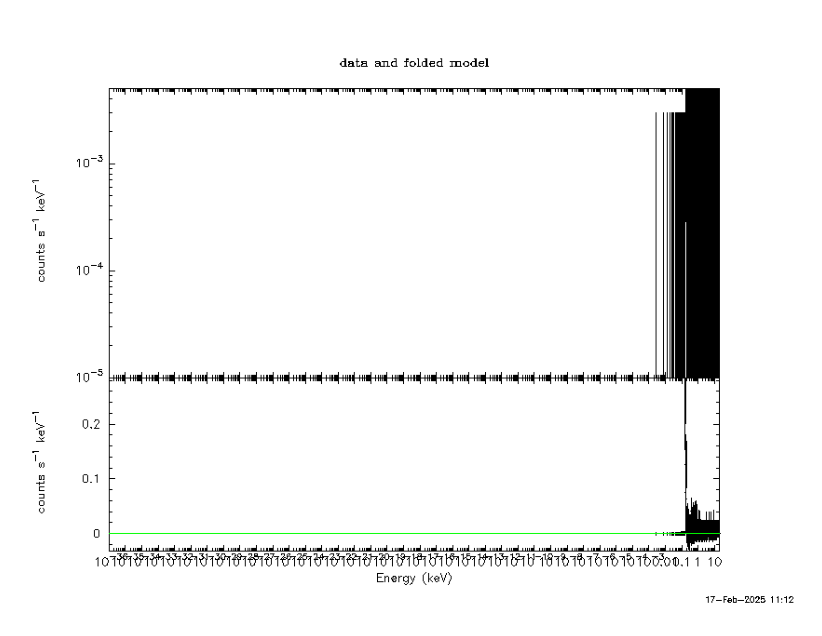

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

img_path = "ObsID0945020137_SRCNUM21_EPN_Spectrum_energy_bremss.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')

### Apec model


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.220840e+11     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.220840e+11     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 4093 degrees o

(-0.5, 861.5, 664.5, -0.5)

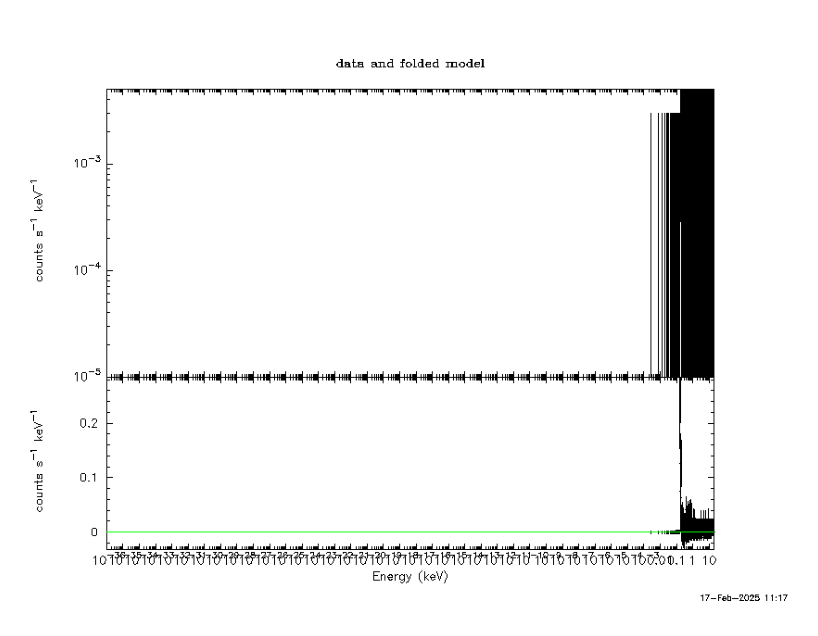

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

img_path = "ObsID0945020137_SRCNUM21_EPN_Spectrum_energy_apec.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')

### Powerlaw model


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.675932e+12     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.675932e+12     using 4096 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 4093 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex   

(-0.5, 860.5, 662.5, -0.5)

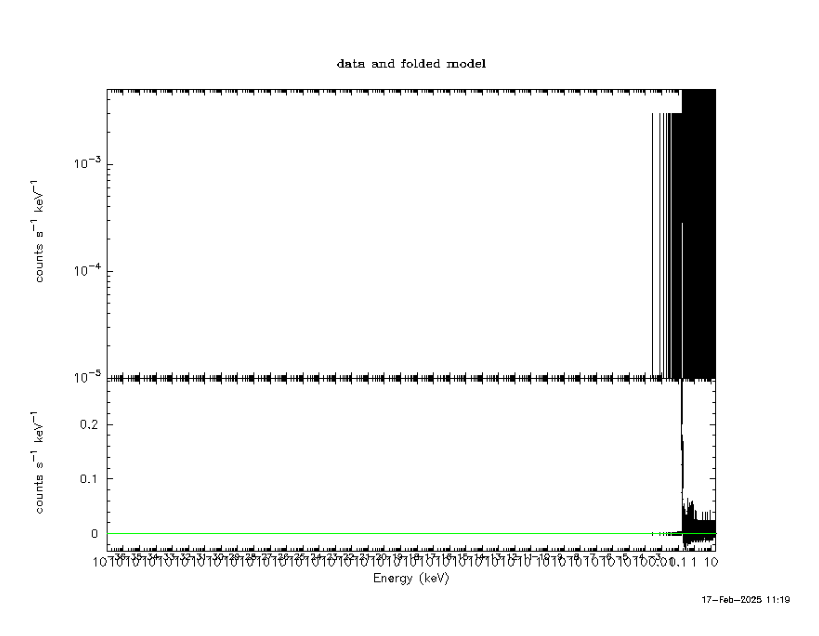

In [9]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

img_path = "ObsID0945020137_SRCNUM21_EPN_Spectrum_energy_powerlaw.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')

## Flux

In [10]:
AllModels.calcFlux(".2 12.0")

 Model Flux         0 photons (0 ergs/cm^2/s) range (0.20000 - 12.000 keV)
